In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Timedelta
import numpy as np
import warnings
warnings.filterwarnings("ignore")


pd.set_option('display.max_columns', None)

In [2]:
# WE DEFINED THIS FUNCTION IN ORDER TO CREATE A NEW COLUMN 'SCONTO_PERC_MEDIO_NOME_CAMPAGNA'.
# FIRST OF ALL WE ORGANISED 'NOME_CAMPAGNA' in 11 CATEGORIES: back_to_school, basket, black_friday, fuori_tutto, passione_casa, sottocosto, 
# tasso_zero, special_days, fly, bike, 50% and other.
# THEN, FOR EACH CATEGORY WE CALCULATED THE AVERAGE DISCOUNT OF THE PRODUCTS
# WE WILL APPLY THIS FUNCTION TO EACH PRODUCT GROUP DATAFRAME

def nomi_campagna(df):
    
    pattern = ['BACK TO SCHOOL', 'BACK TO SCHOOL 1', 'BACK TO SCHOOL 2', 'Back to School', 'Back to School continua']
    df.NOME_CAMPAGNA.replace(pattern, 'back_to_school', inplace = True)

    pattern = ['BASKET', 'BASKET INTERESSI ZERO + TRADE IN', 'BASKET MARZO', 'BASKET SCONTI APRILE', 'BASKET SCONTI FEBBRAIO', 'BASKET SCONTI FEBBRAIO 2']
    df.NOME_CAMPAGNA.replace(pattern, 'basket', inplace = True)

    pattern = ['BLACK FRIDAY - EPISODIO 1', 'BLACK FRIDAY - EPISODIO 3', 'BLACK FRIDAY EP.0', 'BLACK FRIDAY EP.1',
            'BLACK FRIDAY EP.2', 'Bastard Black Friday', 'Black Addams Friday', 'Black Addams Friday Continua', 'Black Rock Friday',
            'Change Black Friday', 'Change Black Friday 2', 'Change Black Friday Gran Finale', 'Change Black Friday', 
            'Manà Manà Black Friday', 'Manà Manà Black Friday continua','Manà Manà Black Friday continua 2', 'Manà Manà Black Friday continua 3',
            'BF 2 - TEMPTATION BLACK FRIDAY', 'SUMMER BLACK FRIDAY 2', 'SUMMER BLACK FRIDAY 1', 'Summer Black Friday', 'Summer Black Friday 2']
    df.NOME_CAMPAGNA.replace(pattern, 'black_friday', inplace = True)

    pattern = ['Continua il Fuoritutto Gennaio', 'FUORITUTTO 1','FUORITUTTO 1 AGOSTO','FUORITUTTO 2','FUORITUTTO 2 AGOSTO','Fuoritutto',
            'Fuoritutto 1','Fuoritutto 1 Summer','Fuoritutto 2','Fuoritutto 2 Summer','Fuoritutto Continua','Fuoritutto Gennaio','Fuoritutto Inverno 1',
            'Fuoritutto Inverno 2','Fuoritutto1 E','Fuoritutto1 W','Fuoritutto2 E','Fuoritutto2 W','Il Vero Fuoritutto', 'Il Vero Fuoritutto continua']
    df.NOME_CAMPAGNA.replace(pattern, 'fuori_tutto', inplace = True)

    pattern = ['PASSIONE CASA','PASSIONE CASA - BUONI INNOVAZIONE','Passione Casa','Passione Casa - Hitachi Abbinato',
            'Passione Casa - Kitchenaid Abbinato','Passione Casa Settembre','Passione casa']
    df.NOME_CAMPAGNA.replace(pattern, 'passione_casa', inplace = True)

    pattern = ['SOTTOCOSTO', 'SOTTOCOSTO LUGLIO', 'SOTTOCOSTO NATALE', 'Sottoprezzo','Sottocosto Natale','Sottocosto Luglio','Sottocosto Giugno',
            'Sottocosto Dicembre','Sottocosto Autunno','Sottocosto 2', 'Sottocosto', "Sotto Costo un mare d'offerte"]
    df.NOME_CAMPAGNA.replace(pattern, 'sottocosto', inplace = True)

    pattern = ['Happy Sconti - Tasso 0', 'Tasso 0 Risparmio Vero',"Tasso 0 - Sconti d'Estate",'Tasso 0 - Sconti', 'TASSO ZERO - IT TRADE IN','TASSO ZERO',
            'TASSO 0 - SPECIALE PULIZIA'," Solo il Meglio? E' scontato - Tasso Zero", 'Settembre di Sconti - Tasso 0', 'UN MARE DI SCONTI A TASSO ZERO',
            "Sconti di Settembre Tasso Zero", "Sconti d'Estate a Tasso Zero", "Sconti che Sognavi - Tasso Zero", 'SCONTI DI MAGGIO A TASSO ZERO', 
            'Risparmio Vero Tasso Zero', 'Natale Tasso Zero', 'NATALE A TASSO ZERO','Mare di Sconti - Tasso 0','Happy Sconti - Tasso 0',
            "Solo il Meglio? E' scontato - Tasso Zero"]
    df.NOME_CAMPAGNA.replace(pattern, 'tasso_zero', inplace = True)

    pattern = ['Natalissimi','Halloween Days', 'Primavera di Sconti', 'Fioriscono gli Sconti', 'Collezione primavera', 'CALENDARIO AVVENTO', 'HALLOWEEN WEEK',
            'Summer Days', 'I Natalissimi', 'Buon anno con Unieuro']
    df.NOME_CAMPAGNA.replace(pattern, 'special_days', inplace = True)

    pattern = ['Flyer Volo', 'VOLAGRATIS', 'Vola con noi']
    df.NOME_CAMPAGNA.replace(pattern, 'fly', inplace = True)

    pattern = ['BIKE IN REGALO', 'Flyer Bike', 'Promo Bike WOW']
    df.NOME_CAMPAGNA.replace(pattern, 'bike', inplace = True)

    pattern = ['Sconti Fino Al 50 - Focus Ped', 'SECONDO AL 50', 'Flyer Secondo Al 50%', 'Sconti Fino Al 50 - Focus Bianco']
    df.NOME_CAMPAGNA.replace(pattern, '50%', inplace = True)

    pattern = ['VOLANTINO BUONI','Ogni momento è buono','TRADE IN PC','Lovely Days',
            'Unieuro ti regala la Mia','Amore al primo acquisto', 'Tanto ti dà Tanto','Cookeo connect',
            'Se Vuoi Puoi','Tra tante offerte la tua','Se Vuoi Puoi 2','E amore al primo acquisto','Noi ci siamo', 'Sconti batticuore']

    df.NOME_CAMPAGNA.replace(pattern, 'other', inplace = True)

    df['SCONTO_PERC_MEDIO_NOME_CAMPAGNA'] = df.groupby('NOME_CAMPAGNA')['SCONTO_PERC'].transform('mean')

# SMARTPHONE

In [3]:
smartphones = pd.read_csv('./Working Code/Datasets/smartphones.csv') 
smartphones.drop('Unnamed: 0', axis=1, inplace=True)

smartphones['DATA_INIZIO'] = pd.to_datetime(smartphones['DATA_INIZIO'])
smartphones['DATA_FINE'] = pd.to_datetime(smartphones['DATA_FINE'])

smartphones['Month'] = smartphones['DATA_INIZIO'].dt.month
smartphones['Month'] = smartphones['Month'].astype(str)

smartphones['Year'] = smartphones['DATA_INIZIO'].dt.year
smartphones_escluso2023 = smartphones[smartphones['Year'] < 2023]   # SAVE A COPY OF THE DATAFRAME EXCLUDING YEAR 2023. IN THE NEXT CELL IT WILL BE EXPLAINED THE REASON
smartphones['Year'].replace([2018, 2019], 'PRE_COVID', inplace=True)
smartphones['Year'].replace([2020, 2021], 'COVID', inplace=True)
smartphones['Year'].replace([2022, 2023], 'POST_COVID', inplace=True)

smartphones['OPERATOR'].fillna('SIM FREE', inplace=True)
smartphones['OPERATOR'].replace('WIND', 'WINDTRE', inplace=True)

In [4]:
nomi_campagna(smartphones)

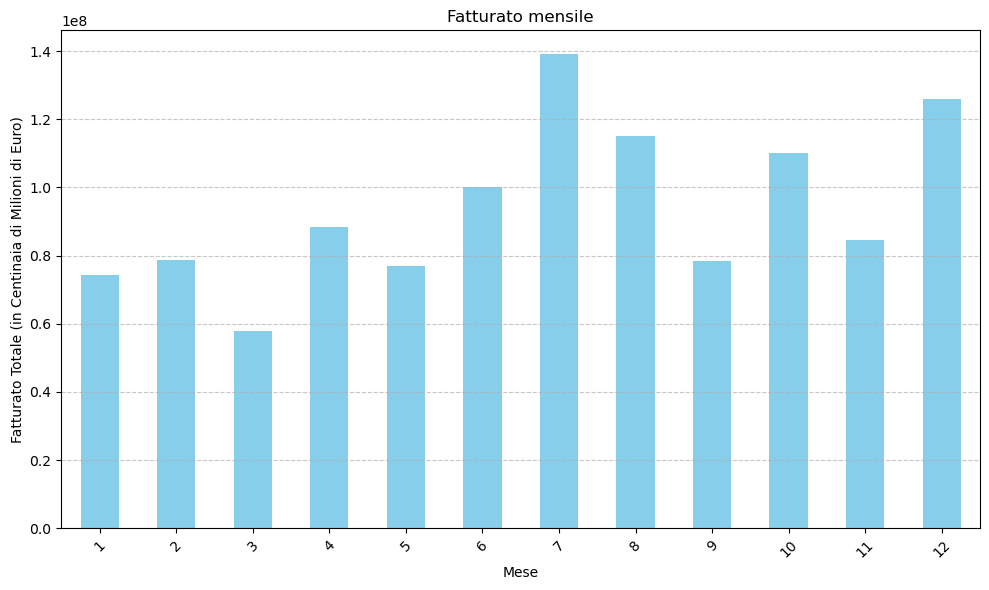

In [5]:
# OUR NEXT GOAL IS TO VISUALIZE WICH ARE THE MOST PROFITABLE MONTHS.
# TO DO THAT WE HAVE TO EXCLUDE YEAR 2023, OTHERWISE WE HAVE LESS OBSERVATIONS FOR NOVEMBER AND DECEMBER BECAUSE WE HAVE THE DATA AVAILABLE UNTIL OCTOBER 2023

monthly_revenue = smartphones_escluso2023.groupby('Month')['FATTURATO_storico'].sum()
monthly_revenue = monthly_revenue.sort_index(key=lambda x: x.astype(int))

# SINCE WE ARE USING 'FATTURATO_storico', WE IMPLEMENTED THE FOLLOWING FUNCTION IN ORDER TO ASSIGN EVERY MONTHLY REVENUE TO THE PREVIOUS MONTH.
# IN FACT 'FATTURATO_storico' REPRESENTS, FOR EVERY 'ART_COD', THE REVENUE OF THE PREVIOUS 30 DAYS

def revenue (series):
    x = series['1']
    for i in range(len(series.index) - 1):
        series[i] = series[i+1]
    series['12'] = x
    return series

revenue(monthly_revenue)

plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar', color='skyblue')
plt.title('Fatturato mensile')
plt.xlabel('Mese')
plt.ylabel('Fatturato Totale (in Centinaia di Milioni di Euro)')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [6]:
monthly_revenue.describe()

count    1.200000e+01
mean     9.414529e+07
std      2.408491e+07
min      5.786833e+07
25%      7.811556e+07
50%      8.644935e+07
75%      1.113925e+08
max      1.391427e+08
Name: FATTURATO_storico, dtype: float64

To classify each month according to his redditivity, we used as reference values approximately the first and third quartiles.

LESS THAN 0.8 -> 1

BETWEEN 0.8 AND 1 -> 2

BIGGER THAN 1 ->3

In [7]:
smartphones['Month'].replace(['1', '2', '3', '5', '9'], 1, inplace=True)
smartphones['Month'].replace(['4', '6', '11'], 2, inplace=True)
smartphones['Month'].replace(['7', '8', '10', '12'], 3, inplace=True)
smartphones.rename(columns={'Month': 'Month_Redditivity'}, inplace=True)   #RENAME THE COLUMN

In [8]:
# REPLACE 'IOS' WITH 1 AND 'ANDROID' WITH 0

smartphones['OPERATING_SYST'].replace('IOS', 1, inplace=True)
smartphones['OPERATING_SYST'].replace('ANDROID', 0, inplace=True)

In [40]:
#smartphones.to_csv('/Users/vincenzocamerlengo/Desktop/Data Science in Action/Unieuro Dataset-20240305/dati_luiss_2/smartphones1.csv', index=False)

# PC

In [9]:
pc = pd.read_csv('./Working Code/Datasets/pc.csv') 
pc.drop('Unnamed: 0', axis=1, inplace=True)

pc['DATA_INIZIO'] = pd.to_datetime(pc['DATA_INIZIO'])
pc['DATA_FINE'] = pd.to_datetime(pc['DATA_FINE'])

pc['Month'] = pc['DATA_INIZIO'].dt.month
pc['Month'] = pc['Month'].astype(str)

pc['Year'] = pc['DATA_INIZIO'].dt.year
pc_escluso2023 = pc[pc['Year'] < 2023]  # SAVE A COPY OF THE DATAFRAME EXCLUDING YEAR 2023. IN THE NEXT CELL IT WILL BE EXPLAINED THE REASON
pc['Year'].replace([2018, 2019], 'PRE_COVID', inplace=True)
pc['Year'].replace([2020, 2021], 'COVID', inplace=True)
pc['Year'].replace([2022, 2023], 'POST_COVID', inplace=True)

In [10]:
nomi_campagna(pc)

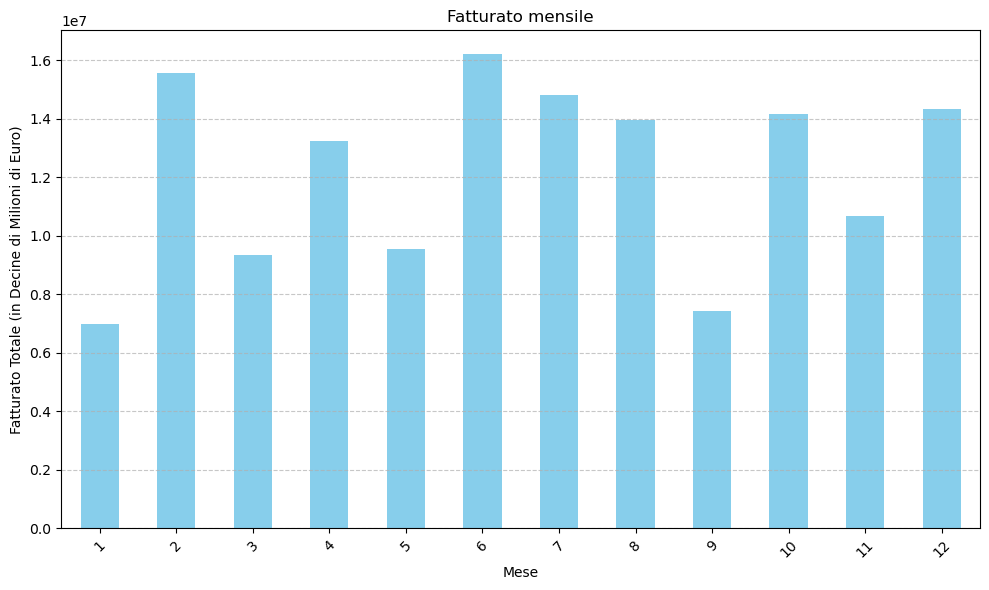

In [11]:
# OUR NEXT GOAL IS TO VISUALIZE WICH ARE THE MOST PROFITABLE MONTHS.
# TO DO THAT WE HAVE TO EXCLUDE YEAR 2023, OTHERWISE WE HAVE LESS OBSERVATIONS FOR NOVEMBER AND DECEMBER BECAUSE WE HAVE THE DATA AVAILABLE UNTIL OCTOBER 2023

monthly_revenue = pc_escluso2023.groupby('Month')['FATTURATO_storico'].sum()
monthly_revenue = monthly_revenue.sort_index(key=lambda x: x.astype(int))
revenue(monthly_revenue)

plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar', color='skyblue')
plt.title('Fatturato mensile')
plt.xlabel('Mese')
plt.ylabel('Fatturato Totale (in Decine di Milioni di Euro)')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [12]:
monthly_revenue.describe()

count    1.200000e+01
mean     1.218473e+07
std      3.220616e+06
min      6.988199e+06
25%      9.494107e+06
50%      1.358791e+07
75%      1.445240e+07
max      1.620991e+07
Name: FATTURATO_storico, dtype: float64

To classify each month according to his redditivity, we used as reference values approximately the first and third quartiles.

LESS THAN 1 -> 1

BETWEEN 1 AND 1.4 -> 2

BIGGER THAN 1.4 ->3

In [13]:
pc['Month'].replace(['1', '3', '5', '9'], 1, inplace=True)
pc['Month'].replace(['4', '8', '11'], 2, inplace=True)
pc['Month'].replace(['2', '6', '7', '10', '12'], 3, inplace=True)
pc.rename(columns={'Month': 'Month_Redditivity'}, inplace=True)   #RENAME THE COLUMN

In [41]:
#pc.to_csv('/Users/vincenzocamerlengo/Desktop/Data Science in Action/Unieuro Dataset-20240305/dati_luiss_2/pc1.csv', index=False)

# WASH

In [14]:
wash = pd.read_csv('./Working Code/Datasets/wash.csv') 
wash.drop('Unnamed: 0', axis=1, inplace=True)

wash['DATA_INIZIO'] = pd.to_datetime(wash['DATA_INIZIO'])
wash['DATA_FINE'] = pd.to_datetime(wash['DATA_FINE'])

wash['Month'] = wash['DATA_INIZIO'].dt.month
wash['Month'] = wash['Month'].astype(str)

wash['Year'] = wash['DATA_INIZIO'].dt.year
wash_escluso2023 = wash[wash['Year'] < 2023]  # SAVE A COPY OF THE DATAFRAME EXCLUDING YEAR 2023. IN THE NEXT CELL IT WILL BE EXPLAINED THE REASON
wash['Year'].replace([2018, 2019], 'PRE_COVID', inplace=True)
wash['Year'].replace([2020, 2021], 'COVID', inplace=True)
wash['Year'].replace([2022, 2023], 'POST_COVID', inplace=True)

In [15]:
nomi_campagna(wash)

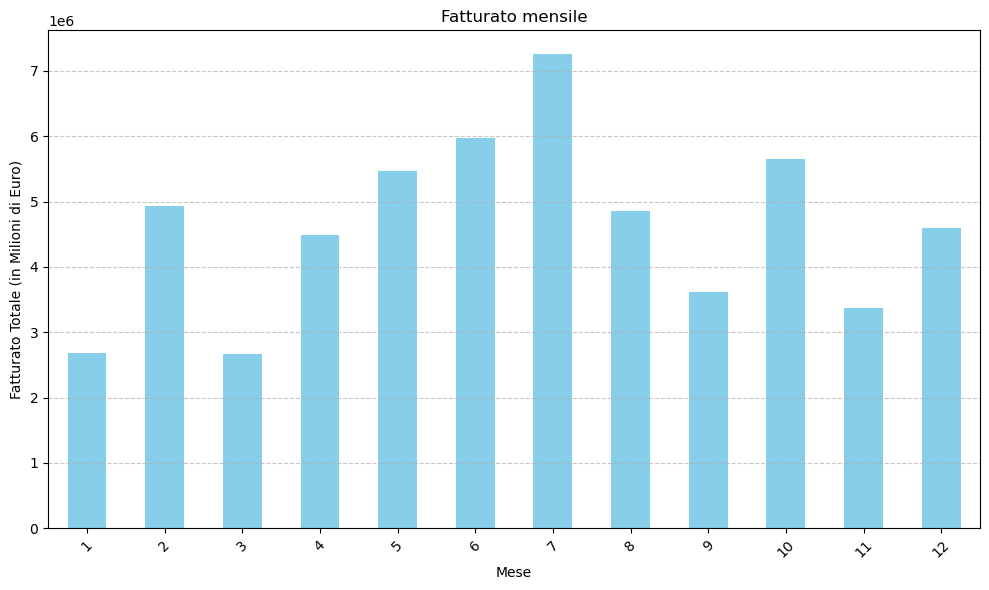

In [16]:
# OUR NEXT GOAL IS TO VISUALIZE WICH ARE THE MOST PROFITABLE MONTHS.
# TO DO THAT WE HAVE TO EXCLUDE YEAR 2023, OTHERWISE WE HAVE LESS OBSERVATIONS FOR NOVEMBER AND DECEMBER BECAUSE WE HAVE THE DATA AVAILABLE UNTIL OCTOBER 2023

monthly_revenue = wash_escluso2023.groupby('Month')['FATTURATO_storico'].sum()
monthly_revenue = monthly_revenue.sort_index(key=lambda x: x.astype(int))
revenue(monthly_revenue)

plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar', color='skyblue')
plt.title('Fatturato mensile')
plt.xlabel('Mese')
plt.ylabel('Fatturato Totale (in Milioni di Euro)')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
monthly_revenue.describe()

count    1.200000e+01
mean     4.628315e+06
std      1.378088e+06
min      2.663481e+06
25%      3.559195e+06
50%      4.725938e+06
75%      5.512678e+06
max      7.259036e+06
Name: FATTURATO_storico, dtype: float64

To classify each month according to his redditivity, we used as reference values approximately the first and third quartiles.

LESS THAN 3 -> 1

BETWEEN 3 AND 5 -> 2

BIGGER THAN 5 ->3

In [18]:
wash['Month'].replace(['1', '3'], 1, inplace=True)
wash['Month'].replace(['2', '4', '8', '9', '11', '12'], 2, inplace=True)
wash['Month'].replace(['5', '6', '7', '10'], 3, inplace=True)
wash.rename(columns={'Month': 'Month_Redditivity'}, inplace=True)   # RENAME THE COLUMN

In [42]:
#wash.to_csv('/Users/vincenzocamerlengo/Desktop/Data Science in Action/Unieuro Dataset-20240305/dati_luiss_2/wash1.csv', index=False)

# CORE WEAR

In [19]:
core_wear = pd.read_csv('./Working Code/Datasets/core_wear.csv') 
core_wear.drop('Unnamed: 0', axis=1, inplace=True)

core_wear['DATA_INIZIO'] = pd.to_datetime(core_wear['DATA_INIZIO'])
core_wear['DATA_FINE'] = pd.to_datetime(core_wear['DATA_FINE'])

core_wear['Month'] = core_wear['DATA_INIZIO'].dt.month
core_wear['Month'] = core_wear['Month'].astype(str)

core_wear['Year'] = core_wear['DATA_INIZIO'].dt.year
core_wear_escluso2023 = core_wear[core_wear['Year'] < 2023]  # SAVE A COPY OF THE DATAFRAME EXCLUDING YEAR 2023. IN THE NEXT CELL IT WILL BE EXPLAINED THE REASON
core_wear['Year'].replace([2018, 2019], 'PRE_COVID', inplace=True)
core_wear['Year'].replace([2020, 2021], 'COVID', inplace=True)
core_wear['Year'].replace([2022, 2023], 'POST_COVID', inplace=True)

In [20]:
nomi_campagna(core_wear)

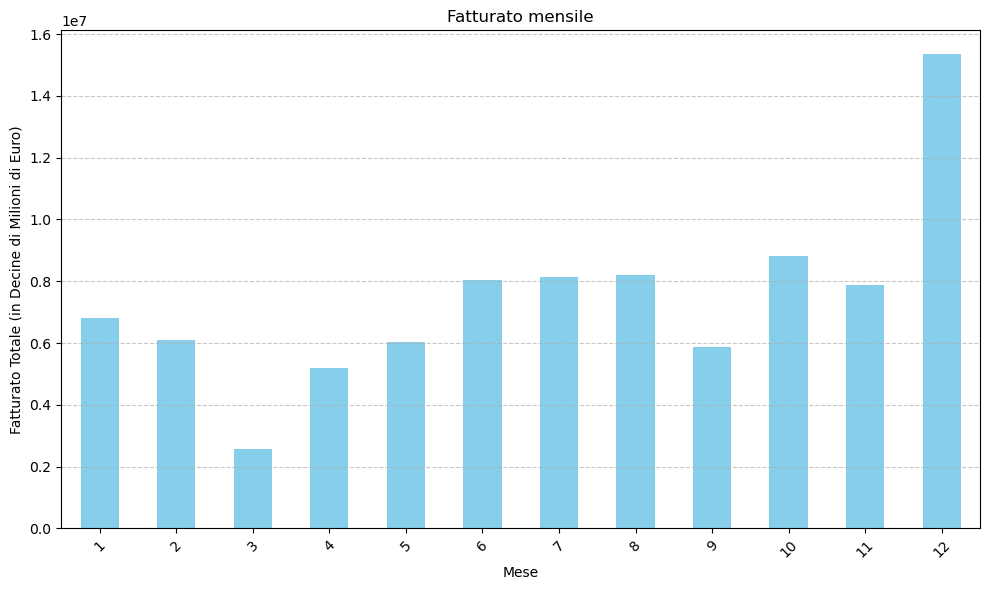

In [21]:
# OUR NEXT GOAL IS TO VISUALIZE WICH ARE THE MOST PROFITABLE MONTHS.
# TO DO THAT WE HAVE TO EXCLUDE YEAR 2023, OTHERWISE WE HAVE LESS OBSERVATIONS FOR NOVEMBER AND DECEMBER BECAUSE WE HAVE THE DATA AVAILABLE UNTIL OCTOBER 2023

monthly_revenue = core_wear_escluso2023.groupby('Month')['FATTURATO_storico'].sum()
monthly_revenue = monthly_revenue.sort_index(key=lambda x: x.astype(int))
revenue(monthly_revenue)

plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar', color='skyblue')
plt.title('Fatturato mensile')
plt.xlabel('Mese')
plt.ylabel('Fatturato Totale (in Decine di Milioni di Euro)')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [22]:
monthly_revenue.describe()

count    1.200000e+01
mean     7.415167e+06
std      3.042036e+06
min      2.551468e+06
25%      5.985594e+06
50%      7.353141e+06
75%      8.144371e+06
max      1.535838e+07
Name: FATTURATO_storico, dtype: float64

To classify each month according to his redditivity, we used as reference values approximately the first and third quartiles.

LESS THAN 0.6 -> 1

BETWEEN 0.6 E 0.9 -> 2

BIGGER THAN 0.9 ->3

HOWEVER WE DECIDED TO ASSIGN 5 AT DECEMBERE BECAUSE IS INCREDIBLE PROFITABLE RESPECT TO OTHER MONTHS


In [23]:
core_wear['Month'].replace(['3', '4', '9'], 1, inplace=True)
core_wear['Month'].replace(['1', '2' ,'5', '6', '7', '8', '10', '11'], 2, inplace=True)
core_wear['Month'].replace(['12'], 5, inplace=True)
core_wear.rename(columns={'Month': 'Month_Redditivity'}, inplace=True) # RENAME THE COLUMNS

In [24]:
# REPLACE 'NOT DEFINED' WITH NULL VALUES. THEN WE PERFORMED AN ORDINAL ENCODING ACCORDING TO THE DISPLAY QUALITY.
# FINALLY WE REPLACED NULL VALUES WITH THE MEAN

core_wear['DISPLAY_QUALITY'].replace('NOT DEFINED', np.nan, inplace=True)
core_wear['DISPLAY_QUALITY'].replace('ELECTRONIC INK', 1, inplace=True)
core_wear['DISPLAY_QUALITY'].replace('LCD-DISPLAY', 2, inplace=True)
core_wear['DISPLAY_QUALITY'].replace('OLED-DISPLAY', 3, inplace=True)
core_wear['DISPLAY_QUALITY'].fillna(round(core_wear['DISPLAY_QUALITY'].mean(), 2), inplace=True)

In [43]:
#core_wear.to_csv('/Users/vincenzocamerlengo/Desktop/Data Science in Action/Unieuro Dataset-20240305/dati_luiss_2/core_wear1.csv', index=False)

# TV

In [25]:
tv = pd.read_csv('./Working Code/Datasets/tv.csv') 
tv.drop('Unnamed: 0', axis=1, inplace=True)

tv['DATA_INIZIO'] = pd.to_datetime(tv['DATA_INIZIO'])
tv['DATA_FINE'] = pd.to_datetime(tv['DATA_FINE'])

tv['Month'] = tv['DATA_INIZIO'].dt.month
tv['Month'] = tv['Month'].astype(str)

tv['Year'] = tv['DATA_INIZIO'].dt.year
tv_escluso2023 = tv[tv['Year'] < 2023]  # SAVE A COPY OF THE DATAFRAME EXCLUDING YEAR 2023. IN THE NEXT CELL IT WILL BE EXPLAINED THE REASON
tv['Year'].replace([2018, 2019], 'PRE_COVID', inplace=True)
tv['Year'].replace([2020, 2021], 'COVID', inplace=True)
tv['Year'].replace([2022, 2023], 'POST_COVID', inplace=True)

In [26]:
nomi_campagna(tv)

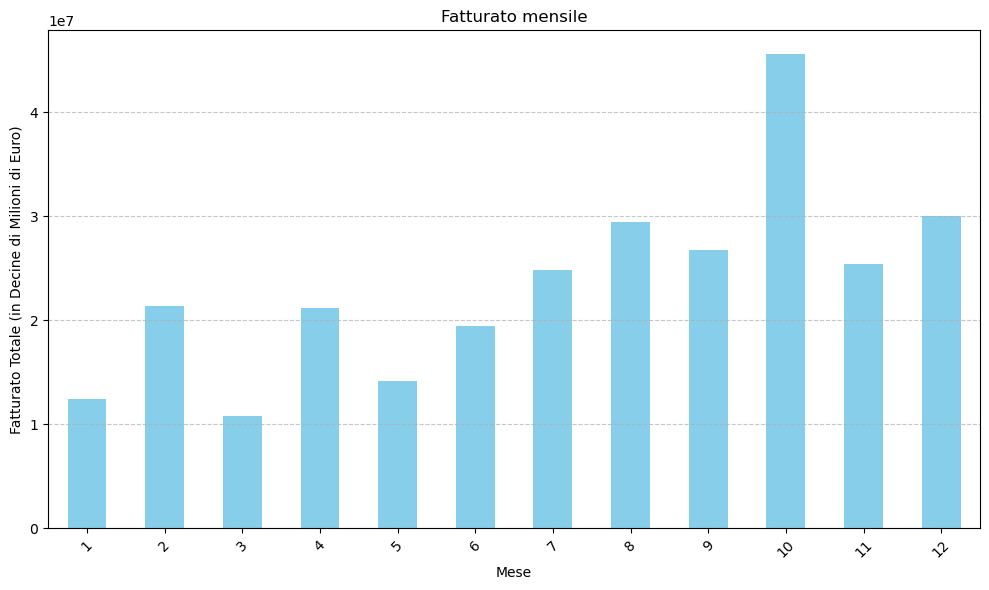

In [27]:
# OUR NEXT GOAL IS TO VISUALIZE WICH ARE THE MOST PROFITABLE MONTHS.
# TO DO THAT WE HAVE TO EXCLUDE YEAR 2023, OTHERWISE WE HAVE LESS OBSERVATIONS FOR NOVEMBER AND DECEMBER BECAUSE WE HAVE THE DATA AVAILABLE UNTIL OCTOBER 2023

monthly_revenue = tv_escluso2023.groupby('Month')['FATTURATO'].sum()
monthly_revenue = monthly_revenue.sort_index(key=lambda x: x.astype(int))
revenue(monthly_revenue)

plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='bar', color='skyblue')
plt.title('Fatturato mensile')
plt.xlabel('Mese')
plt.ylabel('Fatturato Totale (in Decine di Milioni di Euro)')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [28]:
monthly_revenue.describe()

count    1.200000e+01
mean     2.346092e+07
std      9.423491e+06
min      1.080361e+07
25%      1.815993e+07
50%      2.309603e+07
75%      2.742991e+07
max      4.557793e+07
Name: FATTURATO, dtype: float64

To classify each month according to his redditivity, we used as reference values approximately the first and third quartiles.

LESS THAN 2 -> 1

BETWEEN 2 AND 3 -> 2

BIGGER THAN 3 -> 3

HOWEVER WE DECIDED TO ASSIGN 4 AT OCTOBER BECAUSE IS INCREDIBLE PROFITABLE RESPECT TO OTHER MONTHS

In [29]:
tv['Month'].replace(['1', '3', '5', '6'], 1, inplace=True)
tv['Month'].replace(['2', '4', '7', '8', '9', '11', '12'], 2, inplace=True)
tv['Month'].replace(['10'], 4, inplace=True)
tv.rename(columns={'Month': 'Month_Redditivity'}, inplace=True) #RENAME THE COLUMN

In [44]:
#tv.to_csv('/Users/vincenzocamerlengo/Desktop/Data Science in Action/Unieuro Dataset-20240305/dati_luiss_2/tv1.csv', index=False)